In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import pickle

from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors

sns.set(style='ticks', context='notebook', font_scale=1.2)

In [12]:
df = pd.read_csv('../data/df_results.csv', index_col=0)
df

,product_smiles,r1_label,r1_smiles,r1_smiles_raw,r3_label,r3_smiles,r3_smiles_raw,r4_label,r4_smiles,r4_smiles_raw,...,r5_TSRW10,r5_MW,r5_AMW,r5_WPath,r5_WPol,r5_Zagreb1,r5_Zagreb2,r5_mZagreb2,r5_type,r5_ix
0,CCOCN(C(C)=O)c1c(C)c(C)c(C)c2nsnc12,R1_0,CCOC,CCOC,R3_0,C,C,R4_0,C,C,...,1.000000,16.031300,3.206260,0,0,0.0,0.0,0.000000,R5,0
1,CCOCN(C(C)=O)c1c(C)c(C)c(C(F)(F)F)c2nsnc12,R1_0,CCOC,CCOC,R3_0,C,C,R4_0,C,C,...,24.179697,70.003035,14.000607,9,0,12.0,9.0,1.000000,R5,1
2,CCOCN(C(C)=O)c1c(C)c(C)c(C#N)c2nsnc12,R1_0,CCOC,CCOC,R3_0,C,C,R4_0,C,C,...,7.493061,27.010899,9.003633,1,0,2.0,1.0,1.000000,R5,2
3,CCOCN(C(C)=O)c1c(C)c(C)c(OC)c2nsnc12,R1_0,CCOC,CCOC,R3_0,C,C,R4_0,C,C,...,7.493061,32.026215,5.337702,1,0,2.0,1.0,1.000000,R5,3
4,CCOCN(C(C)=O)c1c(C)c(C)c(OC(F)(F)F)c2nsnc12,R1_0,CCOC,CCOC,R3_0,C,C,R4_0,C,C,...,29.418928,85.997949,14.332992,16,0,20.0,16.0,1.000000,R5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,CC(=O)N(c1c(N(C)C)c(N(C)C)c(SC(F)(F)F)c2nsnc12...,R1_1,FC(F)C(F)(F)F,FC(F)C(F)(F)F,R3_7,N(C)C,N(C)C,R4_7,N(C)C,N(C)C,...,29.418928,101.975106,16.995851,16,0,20.0,16.0,1.000000,R5,6
1403,CC(=O)N(c1c(N(C)C)c(N(C)C)c(Br)c2nsnc12)C(F)(F...,R1_1,FC(F)C(F)(F)F,FC(F)C(F)(F)F,R3_7,N(C)C,N(C)C,R4_7,N(C)C,N(C)C,...,1.000000,79.926162,39.963081,0,0,0.0,0.0,0.000000,R5,7
1404,CC(=O)N(c1c(N(C)C)c(N(C)C)c(N(C)C)c2nsnc12)C(F...,R1_1,FC(F)C(F)(F)F,FC(F)C(F)(F)F,R3_7,N(C)C,N(C)C,R4_7,N(C)C,N(C)C,...,17.310771,45.057849,4.505785,4,0,6.0,4.0,1.000000,R5,8
1405,CC(=O)N(c1c(N(C)C)c(N(C)C)c([N+](=O)[O-])c2nsn...,R1_1,FC(F)C(F)(F)F,FC(F)C(F)(F)F,R3_7,N(C)C,N(C)C,R4_7,N(C)C,N(C)C,...,17.310771,45.992903,15.330968,4,0,6.0,4.0,1.000000,R5,9


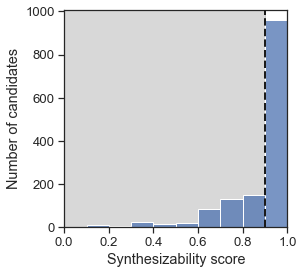

In [56]:
# single RA NN score plot

fig, ax = plt.subplots(1, 1, figsize=(4,4))

sns.histplot(df['ra_nn'], ax=ax, bins=np.linspace(0,1,11), zorder=1)
#ax.set_xlabel('RAscore (neural network)', fontsize=12)
#ax.set_ylabel('Absolute frequency', fontsize=12)

ax.set_xlabel('Synthesizability score')
ax.set_ylabel('Number of candidates')

#_ = ax.set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
_ = ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])

ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.fill_between(x=[xlim[0], 0.9], y1=ylim[0], y2=ylim[1], alpha=0.3, color='gray')
ax.axvline(0.9, ls='--', lw=2, color='k', zorder=20)

ax.set_xlim([0,1])
ax.set_ylim(ylim)

#plt.tight_layout()

fig.savefig('ra-score-hist.pdf', bbox_inches='tight')
fig.savefig('ra-score-hist.png', dpi=300, bbox_inches='tight')

(0.0, 1000.0)